In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import string
#string.punctuation



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\zalian2\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
## Reading in data
data_directory="C:/Users/zalian2/OneDrive - University of Illinois - Urbana/UIUC/Spring 2024/ACE 592 SAE/ACE_592_Project/"
df=pd.read_csv(data_directory+'updated_drug_reviews_cleaned.csv')

In [3]:
df.head()

,Text,Rating,Drug,cleaned_review
0,I started ozempic 9 months ago. At the time I ...,10.0,Ozempic,I started ozempic 9 months ago. At the time I ...
1,I did one injection and have been ill since.\r...,1.0,Ozempic,I did one injection and have been ill since. H...
2,I’ve been Ozempic for 4 weeks. I am so glad t...,10.0,Ozempic,Ive been Ozempic for 4 weeks. I am so glad tha...
3,"Started on Ozempic Sept 2020, starting weight ...",10.0,Ozempic,"Started on Ozempic Sept 2020, starting weight ..."
4,I took one Ozempic injection at .25 and ended ...,1.0,Ozempic,I took one Ozempic injection at .25 and ended ...


In [4]:
df['Drug'].value_counts()

Drug
Ozempic        125
Sitagliptin    125
Mounjaro       125
Rybelsus       125
Victoza        125
Jardiance      125
Name: count, dtype: int64

In [5]:
## I want to 'trim' the the Drug column. For example if the value for the drug column is 'Ozempic ', I want it to be 'Ozempic'
df['Drug'] = df['Drug'].str.strip()
 

In [6]:
## Creating a column for sentiment scores
sid = SentimentIntensityAnalyzer()
df['sentiment'] = [sid.polarity_scores(x)['compound'] for x in df.cleaned_review]


In [8]:
# Creating a function that will remove punctuation
remv_punc = str.maketrans('','',string.punctuation)

In [9]:
## Creating a word cloud for the entire dataset
wcloud = df.cleaned_review.str.cat(sep=' ').lower().translate(remv_punc) ## Creating a string of words
wcloud = wcloud.split(" ") # Converting to a list of words
wcloud = pd.Series(wcloud).value_counts() # Converting to pandas series
wcloud = wcloud[~wcloud.index.isin(stopwords.words("english")+[''])] ## removing stop words and whitespace

In [10]:
## 10 most common words
wcloud.head(10)

side       410
started    396
weight     375
effects    349
taking     338
lost       324
im         319
blood      293
months     284
a1c        277
Name: count, dtype: int64

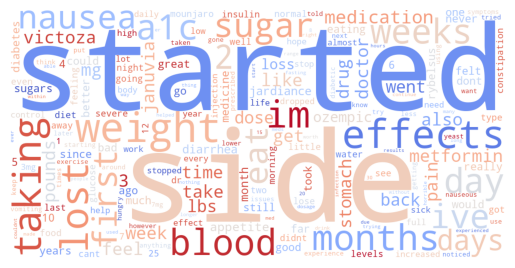

In [11]:
## Word cloud for entire dataset

wordcloud = WordCloud(width = 1000, height = 500, background_color='white', colormap='coolwarm')
wordcloud.generate_from_frequencies(wcloud)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


### Now we want to replicate this process but for each drug. That is, we will get the word count and generate a word cloud for each drug

In [12]:
df['Drug'].unique()

array(['Ozempic', 'Sitagliptin', 'Mounjaro', 'Rybelsus', 'Victoza',
       'Jardiance'], dtype=object)

In [13]:
## Getting average sentiment per drug
import statistics
from statistics import mean
for x in df['Drug'].unique():
    print("Average sentiment score for the drug ", x, 'is:',statistics.mean(df[df['Drug']==x].sentiment))

Average sentiment score for the drug  Ozempic is: -0.1537176
Average sentiment score for the drug  Sitagliptin is: -0.2973976
Average sentiment score for the drug  Mounjaro is: -0.1175864
Average sentiment score for the drug  Rybelsus is: -0.0889928
Average sentiment score for the drug  Victoza is: 0.13205999999999998
Average sentiment score for the drug  Jardiance is: -0.08390399999999999


<Axes: title={'center': "Sentiment scores of Diabetes drugs' user reviews"}, xlabel='Drug', ylabel='Sentiment score'>

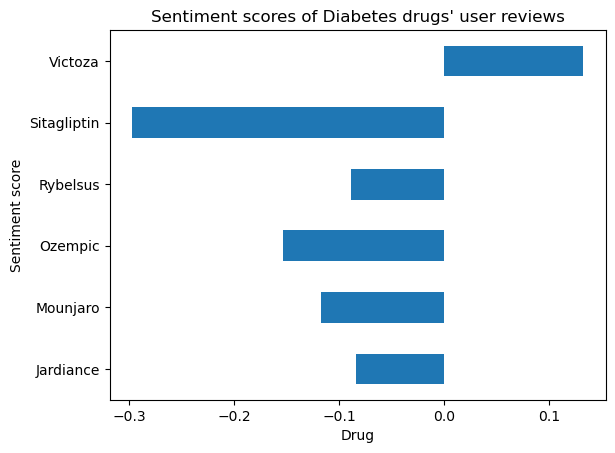

In [14]:
## Creating a chart of the average sentiment of each drug
df.groupby('Drug')['sentiment'].mean().plot(kind='barh', xlabel='Drug', ylabel='Sentiment score',
                                           title="Sentiment scores of Diabetes drugs' user reviews")

**Victoza is the only drug with a positive average of sentiment score. All other drugs in our sample have negative scores with Sitaglptin having the lowest. This is probably due to the fact that users state their symptoms when reviewing the drugs. For example, they could mention that they suffer from pain and diarrhea, so that is why they are taking the drug.**

In [15]:
## Getting rating score sentiment per drug
for x in df['Drug'].unique():
    print("Average rating score for the drug ", x, 'is:',statistics.mean(df.dropna()[df.dropna()['Drug']==x].Rating))

Average rating score for the drug  Ozempic is: 6.585585585585585
Average rating score for the drug  Sitagliptin is: 4.743119266055046
Average rating score for the drug  Mounjaro is: 6.966101694915254
Average rating score for the drug  Rybelsus is: 6.25
Average rating score for the drug  Victoza is: 8.375
Average rating score for the drug  Jardiance is: 5.6521739130434785


<Axes: title={'center': "Rating of Diabetes drugs' user reviews"}, xlabel='Drug', ylabel='Rating'>

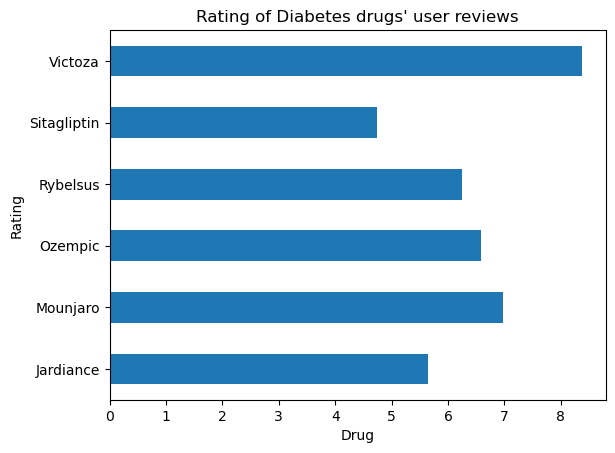

In [16]:
## Creating a chart of the average review score of each drug
df.groupby('Drug')['Rating'].mean().plot(kind='barh', xlabel='Drug', ylabel='Rating',
                                           title="Rating of Diabetes drugs' user reviews")

**Similar to the sentiment output, Victoza is the drug with the highest rating.**

In [17]:
## Creating dictionaries which will store the words for all comments on each drugs. i.e., a string for words for the drug 'Sitagliptin', a string for 
## 'Ozempic', etc. These dictionaries will hold 'keys' for each drug.

s = {} #string dictionary
l = {} #list of words dictionray
p = {} #pandas series dictionary (used to convert lists into series)

for x in df['Drug'].unique():
    s["str_{0}".format(x)] = df[df['Drug']==x].cleaned_review.str.cat(sep=' ').lower().translate(remv_punc) ##For each drug, generate string of words, 
                                                                                                     ##in lower characters, without punctuation
    l["lst_{0}".format(x)] = s["str_{0}".format(x)].split(" ") ##For each string of drug, generate a list that holds all words after splitting by
                                                               ## whitespace
    p["p_{0}".format(x)] = pd.Series(l["lst_{0}".format(x)]).value_counts() ## Creating a pandas series out of the created list. this will store
                                                                            ## word counts of each drug
    p["p_{0}".format(x)] = p["p_{0}".format(x)][~p["p_{0}".format(x)].index.isin(stopwords.words("english")+[''])] ## removing stop words and whitespace

    

In [18]:
## For the word counts and word clouds in the following parts, I will not include the name of the drug

## Word count for Ozempic

p['p_Ozempic'][~p['p_Ozempic'].index.isin(['ozempic'])].head(10)


weeks      80
side       78
weight     74
started    70
lost       69
eat        68
taking     67
nausea     65
effects    63
months     60
Name: count, dtype: int64

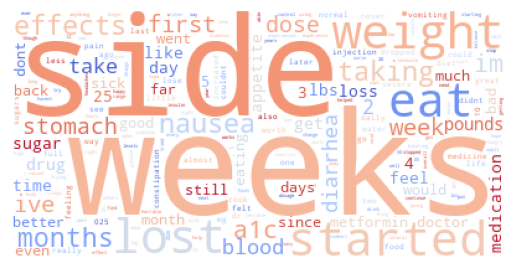

In [19]:
## Word cloud for Ozempic

wordcloud = WordCloud(background_color='white', colormap='coolwarm')
wordcloud.generate_from_frequencies(p['p_Ozempic'][~p['p_Ozempic'].index.isin(['ozempic'])])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


In [20]:
## Word count for Sitagliptin

p['p_Sitagliptin'][~p['p_Sitagliptin'].index.isin(['januvia'])].head(10)



taking       68
pain         64
metformin    64
side         62
months       49
effects      48
doctor       44
blood        43
take         40
sugar        40
Name: count, dtype: int64

**It looks like Sitagliptin and Metformin are used together in some cases. Metformin is another drug used to treat diabetes**
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3541863/ 

**Also, numbers could refer to intake of the drug (i.e., 2 mg)**

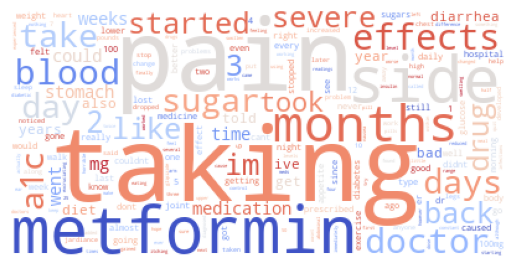

In [21]:
## Word cloud for Sitagliptin

wordcloud = WordCloud(background_color='white', colormap='coolwarm')
wordcloud.generate_from_frequencies(p['p_Sitagliptin'][~p['p_Sitagliptin'].index.isin(['januvia'])])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


In [22]:
## Word count for Mounjaro

p['p_Mounjaro'][~p['p_Mounjaro'].index.isin(['mounjaro'])].head(10)

side          98
effects       94
weight        94
started       75
lost          75
im            68
eat           61
blood         61
day           58
medication    55
Name: count, dtype: int64

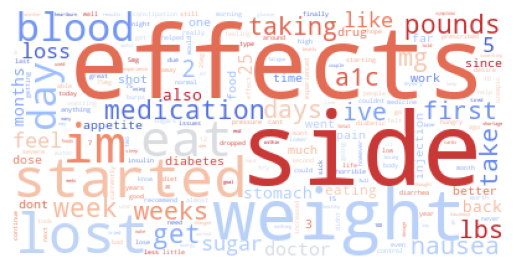

In [23]:
## Word cloud for Mounjaro

wordcloud = WordCloud(background_color='white', colormap='coolwarm')
wordcloud.generate_from_frequencies(p['p_Mounjaro'][~p['p_Mounjaro'].index.isin(['mounjaro'])])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


In [24]:
## Word count for Rybelsus

p['p_Rybelsus'][~p['p_Rybelsus'].index.isin(['rybelsus'])].head(10)


started    88
weight     87
nausea     73
mg         73
taking     68
ive        66
im         65
3mg        63
3          59
a1c        57
Name: count, dtype: int64

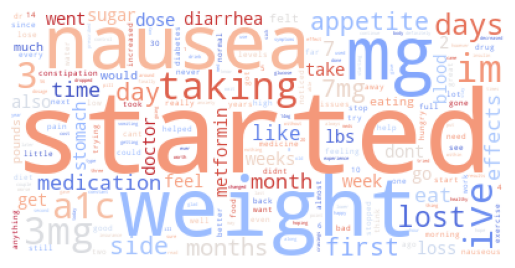

In [25]:
## Word cloud for Rybelsus

wordcloud = WordCloud(background_color='white', colormap='coolwarm')
wordcloud.generate_from_frequencies(p['p_Rybelsus'][~p['p_Rybelsus'].index.isin(['rybelsus'])])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


In [26]:
## Word count for Victoza

p['p_Victoza'][~p['p_Victoza'].index.isin(['victoza'])].head(10)


started    78
lost       75
blood      68
first      67
im         65
side       64
weight     64
2          61
weeks      59
sugar      56
Name: count, dtype: int64

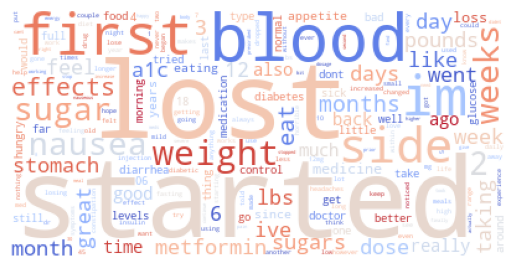

In [27]:
## Word cloud for Victoza

wordcloud = WordCloud(background_color='white', colormap='coolwarm')
wordcloud.generate_from_frequencies(p['p_Victoza'][~p['p_Victoza'].index.isin(['victoza'])])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


In [28]:
## Word count for Jardiance

p['p_Jardiance'][~p['p_Jardiance'].index.isin(['jardiance'])].head(10)


side          57
started       55
yeast         55
taking        54
medication    53
sugar         51
months        49
drug          48
effects       47
day           47
Name: count, dtype: int64

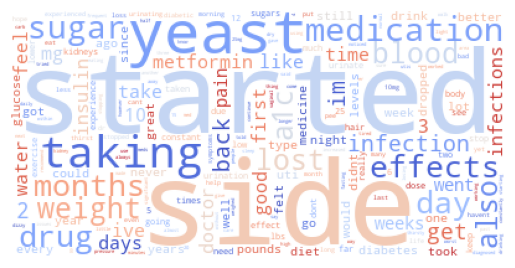

In [29]:
## Word cloud for Jardiance

wordcloud = WordCloud(background_color='white', colormap='coolwarm')
wordcloud.generate_from_frequencies(p['p_Jardiance'][~p['p_Jardiance'].index.isin(['jardiance'])])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


In [30]:
df.to_csv('drug_reviews_processed.csv')